# Problem statement:
This dataset has 10 columns and 4590 rows. Our task is to analyze the dataset and predict the crop outcome of the harvest season by (0,1,2) by developing a supervised machine learning model.

In [2]:
# Import all the required liabrary
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE

In [27]:
#Load Data Set
df = pd.read_csv("train_agriculture.csv")
df_test =pd.read_csv("test_agriculture.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [28]:
#check the shape of data
df.shape

(4599, 10)

In [29]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [62]:
#Check if any missing value present in data
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [31]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

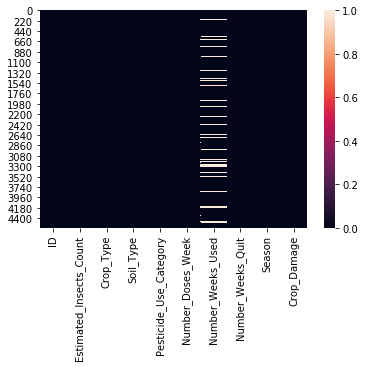

In [32]:
sns.heatmap(df.isnull())

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Crop_Type                  AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Soil_Type                  AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Pesticide_Use_Category     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Number_Doses_Week          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Number_Weeks_Used          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Number_Weeks_Quit          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Season                           AxesSubplot(0.125,0.125;0.0945122x0.343182)
Crop_Damage                   AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

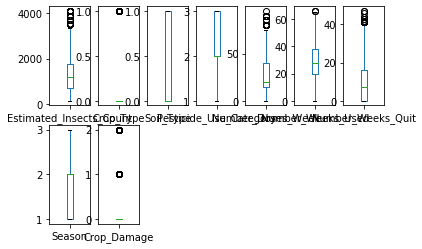

In [33]:
#check outliers
df.plot(kind='box',subplots=True,layout=(2,7))

In [34]:
#Get the count of class of num (0,1,2,3,4)
df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

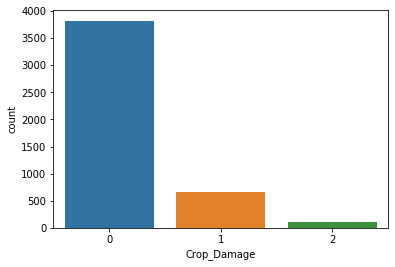

In [35]:
#Visualize the count
sns.countplot(df['Crop_Damage'],label='count')

In [36]:
#get the correlation of columns
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


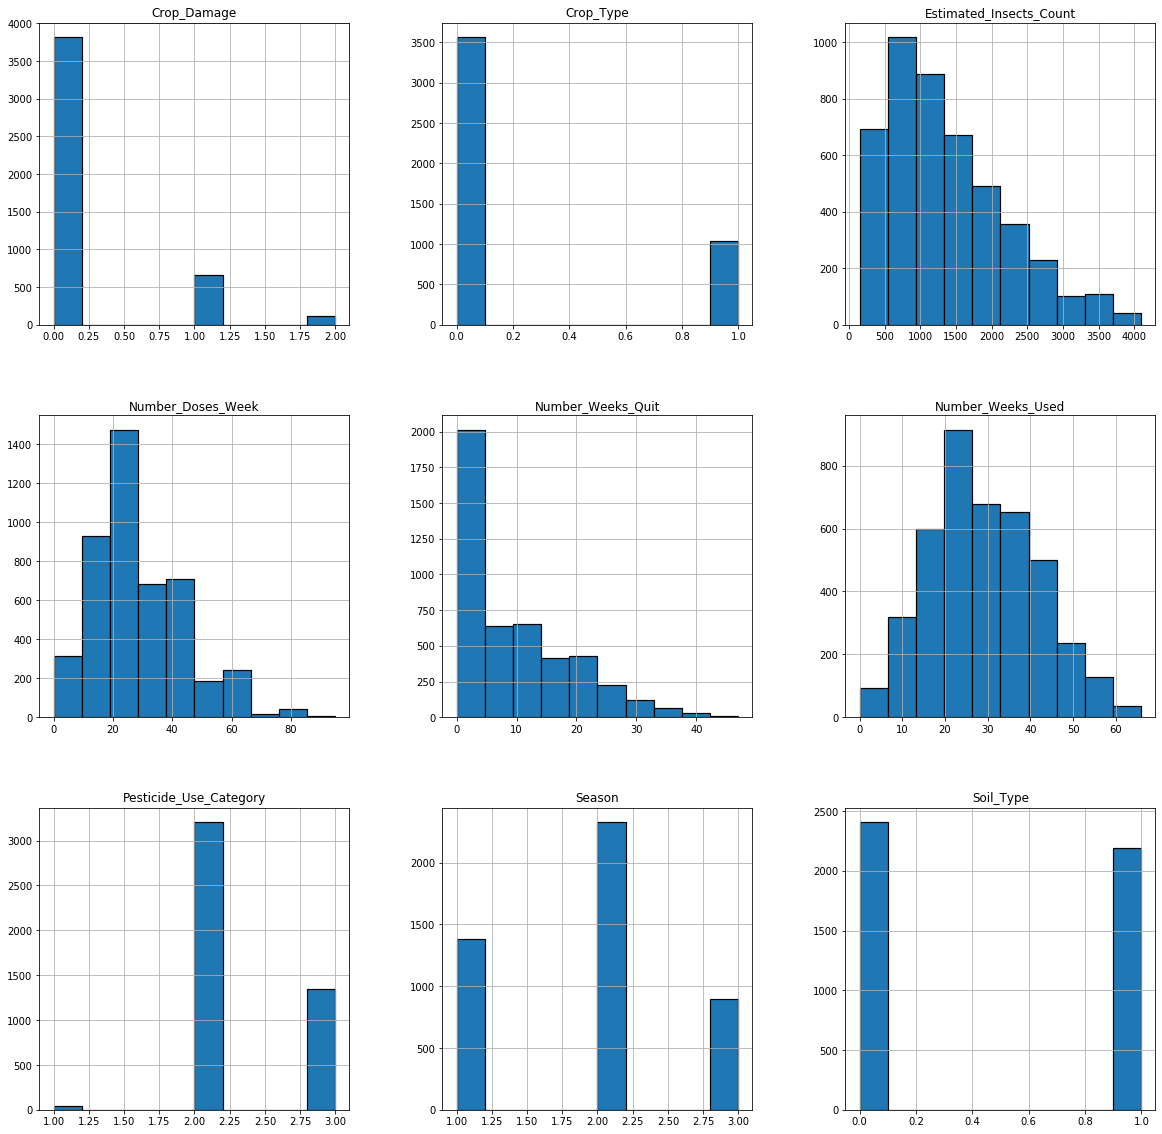

In [37]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

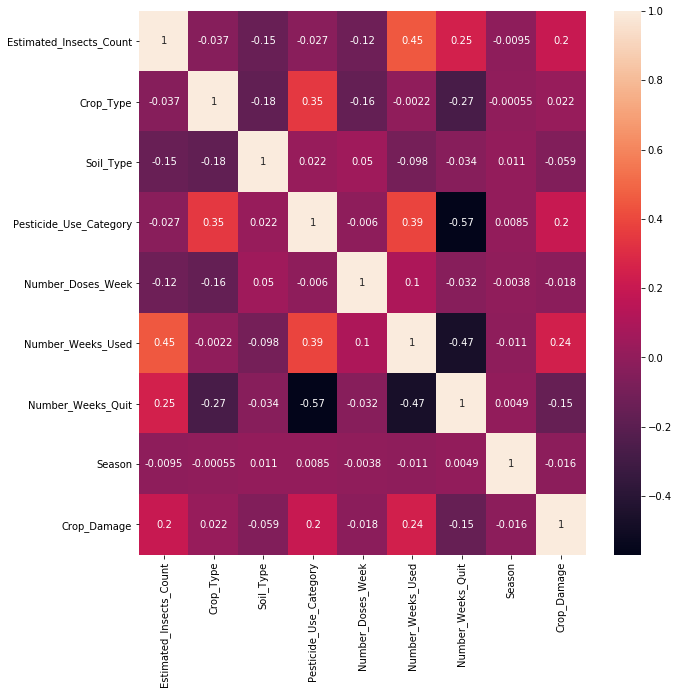

In [38]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [63]:
median = df['Number_Weeks_Used'].median()

df['Number_Weeks_Used'].replace(np.nan,median,inplace=True)

In [40]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

ID : ['F00000001' 'F00000003' 'F00000004' ... 'F00008080' 'F00008082'
 'F00008083']
Estimated_Insects_Count : [ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]
Crop_Type : [1 0]
Soil_Type : [0 1]
Pesticide_Use_Category : [1 3 2]
Number_Doses_Week : [ 0 30 40 60 20 25 45 50 15 10  5 35 70 55 80 90 85 65 75 95]
Number_Weeks_Used : [ 0. 28. 26. 20. 15. 14. 19. 24.  8. 23. 25. 29. 22. 21. 17. 30. 35. 32.
 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43. 50.
 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59. 64.
 13.  7.  5. 12.  6.  9. 58. 11. 65.]
Number_Weeks_Quit : [ 0  1  9  4 13  3 14  6  2 12 15 10  8 11  7  5 17 18 16 20 21 19 22 24
 23 27 

In [41]:
categorical_val

['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season', 'Crop_Damage']

In [42]:
df.drop(['ID'],axis=1,inplace=True)

In [43]:
categorical_val.remove('Crop_Damage',)
data = pd.get_dummies(df, columns = categorical_val)

In [44]:
data.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,0,0.0,0,0,0,1,1,0,1,0,0,1,0,0
1,209,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
3,257,0,0.0,0,1,0,1,0,1,1,0,0,0,1,0
4,342,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0


In [45]:
print(df.columns)
print(data.columns)

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')
Index(['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Crop_Damage', 'Crop_Type_0', 'Crop_Type_1',
       'Soil_Type_0', 'Soil_Type_1', 'Pesticide_Use_Category_1',
       'Pesticide_Use_Category_2', 'Pesticide_Use_Category_3', 'Season_1',
       'Season_2', 'Season_3'],
      dtype='object')


In [46]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']
data[col_to_scale] = s_sc.fit_transform(data[col_to_scale])

In [47]:
data.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,-1.442868,-1.705699,-2.406995,-0.947827,0,0,1,1,0,1,0,0,1,0,0
1,-1.417081,-1.705699,-2.406995,-0.947827,1,0,1,1,0,1,0,0,0,1,0
2,-1.358138,-1.705699,-2.406995,-0.947827,1,0,1,1,0,1,0,0,0,1,0
3,-1.358138,-1.705699,-2.406995,-0.947827,1,0,1,0,1,1,0,0,0,1,0
4,-1.253760,-1.705699,-2.406995,-0.947827,1,0,1,1,0,1,0,0,0,1,0


# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the crop outcome by developing a supervised machine learning model and we want to identify a relation between our output and remaining independent features . This scenario is a classic example of classification.

We are provided with 4590 rows of the labeled dataset tagged with the output column “Crop_Damage” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression

SVC()

DecisionTreeRegressor()

KNeighborsClassifier()

RandomForestClassifier()

# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [48]:
y = data["Crop_Damage"]
x = data.drop("Crop_Damage",axis=1)


# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 30% of the data we have and the remaining 70% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .1 , random_state = 45)


In [50]:
model = [LogisticRegression(solver='liblinear'),SVC(kernel='rbf', gamma=0.1, C=1.0),
         DecisionTreeClassifier(random_state=42),KNeighborsClassifier(n_neighbors=5),
         RandomForestClassifier(n_estimators=1000, random_state=42)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuaracy score of 0.8304347826086956
[[372   9   0]
 [ 60  10   0]
 [  7   2   0]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       381
           1       0.48      0.14      0.22        70
           2       0.00      0.00      0.00         9

    accuracy                           0.83       460
   macro avg       0.44      0.37      0.38       460
weighted avg       0.77      0.83      0.78       460





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.8391304347826087
[[381   0   0]
 [ 65   5   0]
 [  9   0   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       381
           1       1.00      0.07      0.13        70
           2       0.00      0.00      0.00         9

    accuracy                           0.84       460
   macro avg       0.61      0.36      0.35       460
weighted avg       0.85      0.84      0.78       460



accuaracy score of 0.7565217391304347
[[329  42  10]
 [ 47  18   5]
 [  5   3   1]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       381
           1       0.29      0.26      0.27        70
           2       0.06      0.11      0.08         9

    accuracy                           0.76       460
   macro avg       0.40      0.41      0.40       460
weighted avg       0.76      0.76      0.76       460





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.8239130434782609
[[365  16   0]
 [ 56  14   0]
 [  8   1   0]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       381
           1       0.45      0.20      0.28        70
           2       0.00      0.00      0.00         9

    accuracy                           0.82       460
   macro avg       0.43      0.39      0.39       460
weighted avg       0.77      0.82      0.79       460





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.8108695652173913
[[360  18   3]
 [ 52  12   6]
 [  7   1   1]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       381
           1       0.39      0.17      0.24        70
           2       0.10      0.11      0.11         9

    accuracy                           0.81       460
   macro avg       0.45      0.41      0.41       460
weighted avg       0.77      0.81      0.78       460





# we can observe that LogisticRegression() algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of LogisticRegression() is 83%

Accuracy score of SVC() is 83%

Accuracy score of DecisionTreeClassifier() is 75%

Accuracy score of KNeighborsClassifier is 82%

Accuracy score of RandomForestClassifier is 81%

Hence we can say that out all algorithems LogisticRegression() is best for this problem till now however we will use cross validation to select best model.

In [51]:
log=LogisticRegression(solver='liblinear')
log.fit(x_train,y_train)
log.score(x_train,y_train)
pred = log.predict(x_test)
print('accuaracy score of',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('\n')
log

accuaracy score of 0.8304347826086956
[[372   9   0]
 [ 60  10   0]
 [  7   2   0]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       381
           1       0.48      0.14      0.22        70
           2       0.00      0.00      0.00         9

    accuracy                           0.83       460
   macro avg       0.44      0.37      0.38       460
weighted avg       0.77      0.83      0.78       460





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Validation

In [53]:
clf = LogisticRegression(solver='liblinear')

scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
scores.mean()

0.8271377205847565

In [54]:
# number of features in X_train
x_train.shape

(4139, 14)

# Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [55]:
#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 13))}]


#grid search
#specify model
lm = LogisticRegression(solver='liblinear')
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'accuracy',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   13.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='liblinear',
                                                        tol=0.0001, verbose=0,
                   

In [56]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.311369,0.067137,0.004016,3.563945e-03,1,{'n_features_to_select': 1},0.833333,0.835749,0.830918,0.830918,...,0.832084,0.002208,3,0.836605,0.836001,0.830867,0.830867,0.837560,0.834380,0.002911
1,0.268487,0.039170,0.002395,7.987980e-04,2,{'n_features_to_select': 2},0.833333,0.835749,0.844203,0.836957,...,0.835949,0.004849,1,0.836605,0.836001,0.833887,0.835699,0.837560,0.835951,0.001212
2,0.243350,0.008894,0.001995,1.154301e-06,3,{'n_features_to_select': 3},0.833333,0.835749,0.844203,0.836957,...,0.835949,0.004849,1,0.836605,0.836001,0.833887,0.835699,0.837560,0.835951,0.001212
3,0.259306,0.021083,0.001996,1.211955e-06,4,{'n_features_to_select': 4},0.832126,0.823671,0.839372,0.828502,...,0.829910,0.005506,12,0.827847,0.828149,0.829659,0.832075,0.833031,0.830152,0.002077
4,0.297008,0.068536,0.002193,3.985934e-04,5,{'n_features_to_select': 5},0.828502,0.828502,0.840580,0.826087,...,0.830635,0.005098,7,0.831471,0.829659,0.831471,0.835397,0.834239,0.832447,0.002078
5,0.208841,0.011556,0.001796,3.997092e-04,6,{'n_features_to_select': 6},0.828502,0.828502,0.840580,0.828502,...,0.831118,0.004747,5,0.831471,0.829659,0.832075,0.837209,0.837560,0.833595,0.003197
6,0.214825,0.004829,0.001996,4.768372e-07,7,{'n_features_to_select': 7},0.828502,0.828502,0.840580,0.828502,...,0.830635,0.005003,8,0.831471,0.829961,0.832075,0.837209,0.836957,0.833534,0.002979
7,0.204253,0.010120,0.001996,1.728494e-06,8,{'n_features_to_select': 8},0.834541,0.828502,0.835749,0.826087,...,0.830393,0.003974,9,0.832075,0.831471,0.829659,0.832075,0.836957,0.832447,0.002422
8,0.225796,0.023740,0.002594,7.993224e-04,9,{'n_features_to_select': 9},0.832126,0.828502,0.835749,0.826087,...,0.829910,0.003566,10,0.830867,0.831471,0.829659,0.832075,0.832428,0.831300,0.000978
9,0.210038,0.047154,0.003392,1.017738e-03,10,{'n_features_to_select': 10},0.832126,0.826087,0.836957,0.827295,...,0.829910,0.004099,10,0.831169,0.832679,0.829357,0.832377,0.832428,0.831602,0.001239


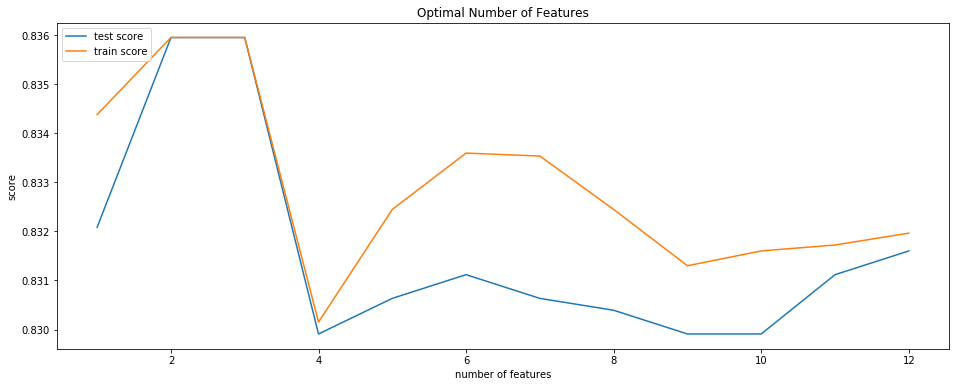

In [65]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [66]:
# final model
n_features_optimal = 3

lm =  LogisticRegression(solver='liblinear')
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.8391304347826087


# Save the model using Pickle

In [59]:
# Save the model using pickle
import pickle

filename = "picklelogfile.pkl"
pickle.dump(rfe, open(filename, 'wb'))


# Conclusion:
we achieved highest accuracy score of 83% by using LogisticRegression which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Clssification Machine Learning prediction model using Python and its powerful libraries which predicts the crop outcome.